In [1]:
# import libraries
from music21 import *
from random import randint
from copy import deepcopy

In [2]:
# example
m1 = stream.Measure()
m1.append(note.Note('C5'))
part1 = [m1] * 8
m2 = stream.Measure()
m2.append(note.Note('A4'))
part2 = [m2] * 8
m3 = stream.Measure()
m3.append(note.Note('F4'))
part3 = [m3] * 8
# decompose each part into all their measures
parts = [
    part1,
    part2,
    part3
]

In [3]:
# generate sequence
# return a list with element of type (partIndex, numberOfMeasures)
def generateSequence(lenOfParts, numberOfParts, cycle, shift):
    # check arguments
    assert lenOfParts != None
    assert numberOfParts > 0
    assert cycle >= 0
    assert shift >= 0
    # initialize sequence and first part
    sequence = []
    curr = randint(0, numberOfParts - 1)
    # fill in sequence
    for i in range(cycle):
        sequence.append((curr, randint(
            max(lenOfParts[curr] - 1 - i - shift, 1), 
            max(lenOfParts[curr] - 1 - i, 1))))
        next = randint(0, numberOfParts - 1)
        while next == curr:
            next = randint(0, numberOfParts - 1)
        curr = next
    return sequence

In [4]:
def generateStream(parts, sequence):
    # check arguments
    assert parts != None
    assert sequence != None
    # initialize stream
    s = stream.Stream()
    # fill in stream
    for seq in sequence:
        for i in range(seq[1]):
            s.append(deepcopy(parts[seq[0]][i]))
    return s

In [5]:
# generate final stream
def generate(parts, cycle, shift):
    # check arguments
    assert parts != None
    assert cycle >= 0
    assert shift >= 0
    # get some values
    lenOfParts = [len(part) for part in parts]
    numberOfParts = len(parts)
    # generate sequence
    sequence = generateSequence(lenOfParts, numberOfParts, cycle, shift)
    # generate stream
    return generateStream(parts, sequence)
        

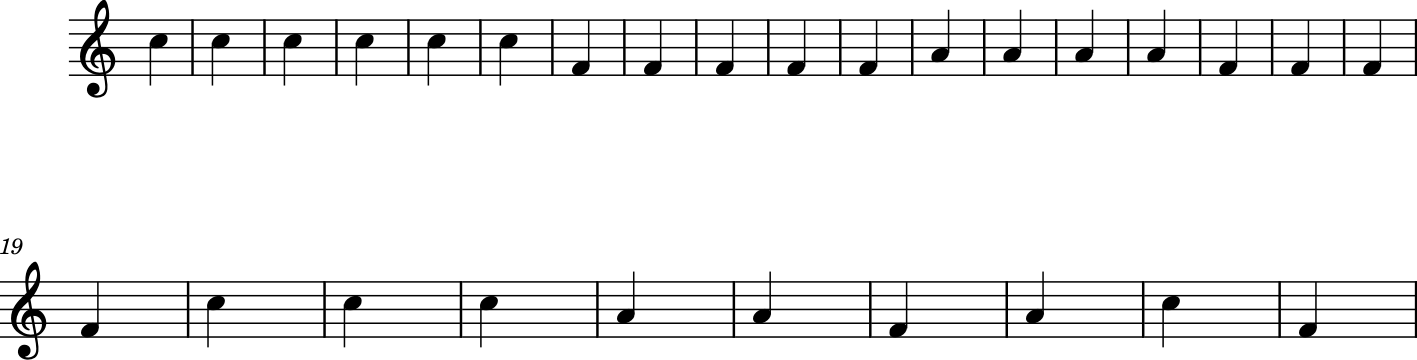

In [6]:
# define the number of transition
cycle = 10
# define the range of randomness for the generation of the number of measures
shift = 1
s = generate(parts, cycle, shift)
s.show()

# Other generation

In [26]:
def generateSequence(nameOfPart, lengthOfPart, maxDuration, limit):
    numberOfPart = len(lengthOfPart)
    curr = randint(0, numberOfPart - 1)
    result = []
    total = 0
    threeMultipleHelp = 1
    while total < limit:
        dur = randint(maxDuration - 1, maxDuration)
        minDur = 0
        if dur != maxDuration:
            minDur = 1.0 / randint(1, 4)
        if dur + minDur <= lengthOfPart[curr]:
            result.append((nameOfPart[curr], dur + minDur))
            total += dur + minDur
            lengthOfPart[curr] -= dur + minDur
        next = randint(0, numberOfPart - 1)
        while next == curr or lengthOfPart[next] == 0:
            next = randint(0, numberOfPart - 1)
        curr = next
        if threeMultipleHelp % 3 == 0 and maxDuration != 1:
            maxDuration -= 1
        threeMultipleHelp += 1
    return result

In [71]:
nameOfPart = ['A', 'B', 'C']
lengthOfPart = [22, 16, 24]
maxDuration = 5
limit = 50
sequence = generateSequence(nameOfPart, lengthOfPart, maxDuration, limit)
for part in sequence:
    print(part)

('A', 5)
('C', 4.333333333333333)
('B', 4.333333333333333)
('C', 3.5)
('A', 4)
('B', 3.25)
('A', 3)
('C', 3.0)
('A', 2.3333333333333335)
('B', 1.3333333333333333)
('C', 2)
('A', 2.0)
('B', 1.0)
('C', 1)
('B', 1.0)
('A', 1.0)
('B', 1)
('A', 1)
('B', 1)
('A', 1)
('C', 0.25)
('A', 1)
('B', 1)
('C', 0.25)
('A', 0.3333333333333333)
('C', 1)
('A', 1.0)
